# Seaborn

- **[sns.distplot()](#sns.distplot())**
- **[sns.jointplot()](#sns.jointplot())**
- **[sns.pairplot()](#sns.pairplot())**
- **[Categorical Plots](#Categorical-Plots)**
    - [sns.barplot()](#sns.barplot())
    - [sns.countplot()](#sns.countplot())
    - [sns.boxplot()](#sns.boxplot())
    - [sns.violinplot()](#sns.violinplot())
    - [sns.swarmplot()](#sns.swarmplot())
- **[Heatmap](#Heatmap)**
    - [.corr()](#.corr())
    - [sns.heatmap()](#sns.heatmap())
- **[Style](#Style)**
    - [sns.set()](#sns.set())

In [27]:
import seaborn as sns
# sns.set('talk', 'white', 'dark', font_scale=1, rc={'lines.linewidth': 2, 'grid.linestyle':'--'})
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## sns.distplot()

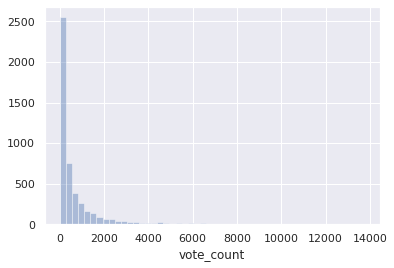

In [39]:
df = pd.read_csv('tmdb_5000_movies.csv')
sns.set()
# sns.set('talk', 'white', 'dark', font_scale=1, rc={'lines.linewidth': 2, 'grid.linestyle':'--'})
sns.distplot(df['vote_count'], norm_hist=False, kde=False)

## sns.jointplot()

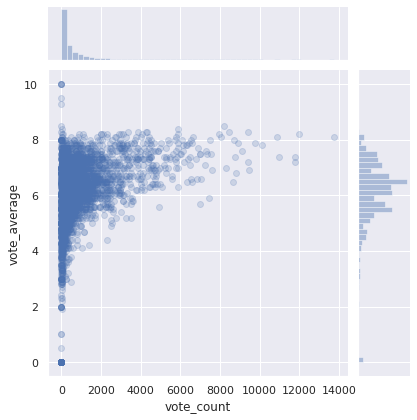

In [8]:
sns.jointplot(x='vote_count', y='vote_average', data=df, alpha=0.2)

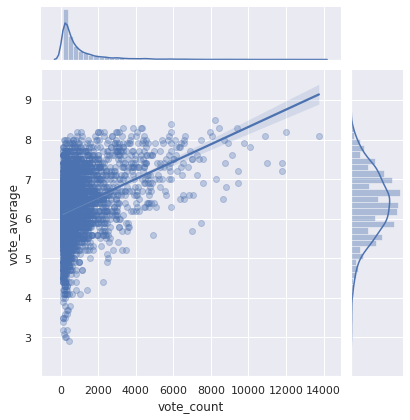

In [40]:
df = pd.read_csv('tmdb_5000_movies.csv')
df = df[df['vote_count'] > 100]
sns.jointplot(x='vote_count', y='vote_average', data=df, kind='reg', joint_kws={'scatter_kws': dict(alpha=0.3)})

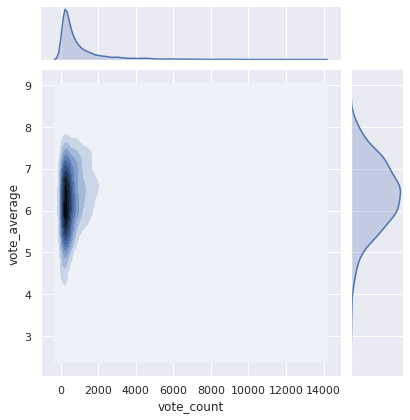

In [17]:
sns.jointplot(x='vote_count', y='vote_average', data=df, kind='kde')

## sns.pairplot()

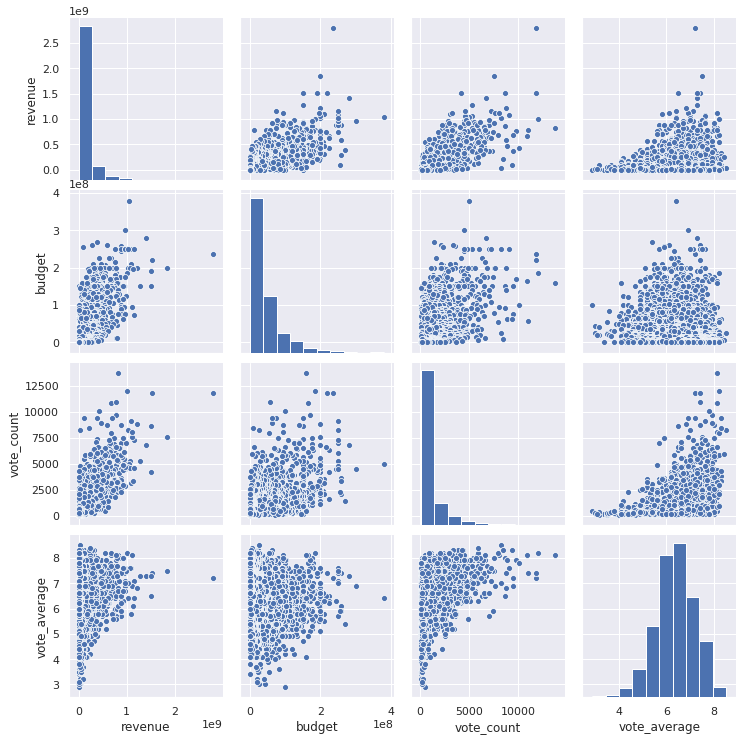

In [20]:
sns.pairplot(df[['revenue', 'budget', 'vote_count', 'vote_average']])

In [42]:
# vote_average lower 50%: low, higher 50%: high
df['evaluation'] = df['vote_average'].apply(lambda x: 'high' if x > df['vote_average'].median() else 'low')

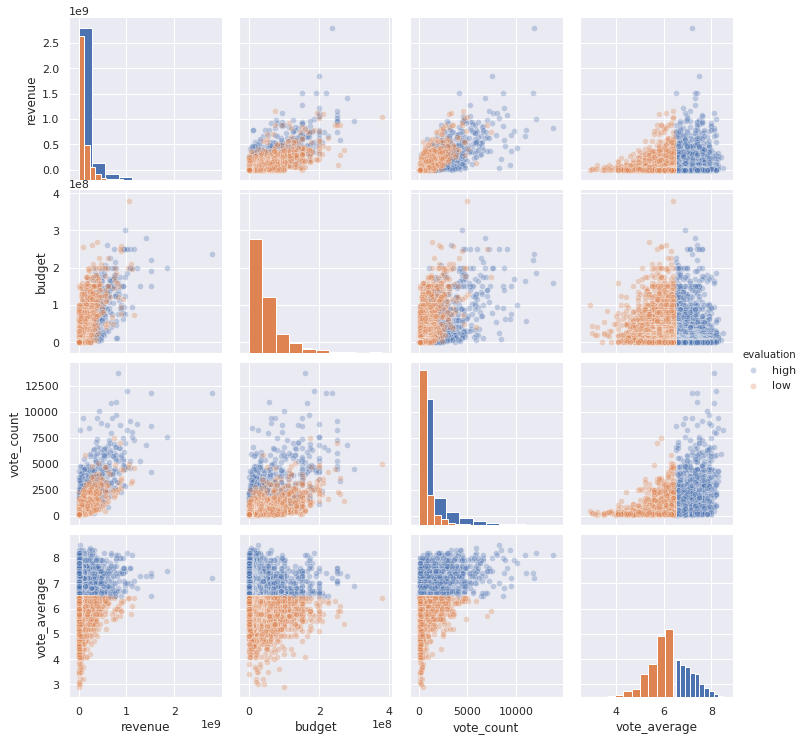

In [43]:
sns.pairplot(df[['revenue', 'budget', 'vote_count', 'vote_average', 'evaluation']], 
             hue='evaluation', 
             plot_kws={'alpha': 0.3},
            diag_kind='hist')

## Categorical Plots

### sns.barplot()

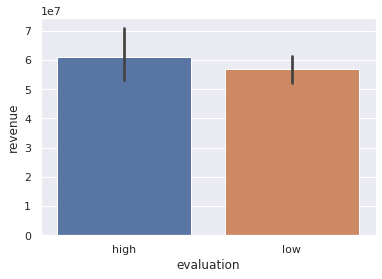

In [46]:
sns.barplot(x='evaluation', y='revenue', data=df, estimator=np.median)

### sns.countplot()

In [51]:
df['year'] = df['release_date'].apply(lambda x: x[:4])

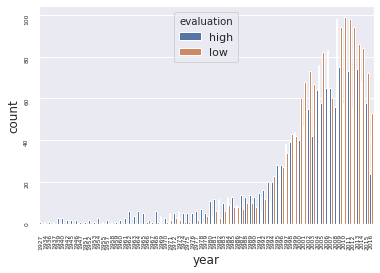

In [56]:
ax = sns.countplot(x='year', data=df, hue='evaluation')
ax.tick_params(rotation=90, labelsize=6)

In [59]:
# create decade column e.g. 2012 -> 2010s
df['decade'] = df['year'].apply(lambda x: x[:3] + "0s")

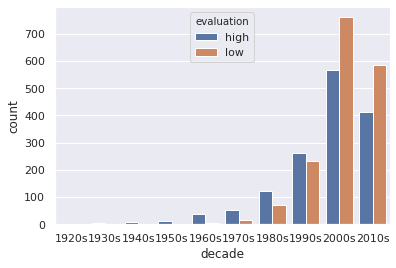

In [60]:
sns.countplot(x='decade', data=df.sort_values('decade'), hue='evaluation')

### sns.boxplot()

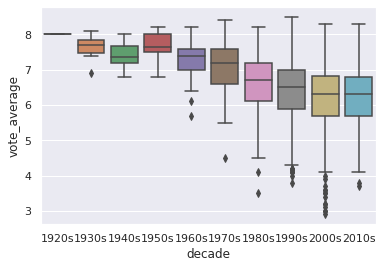

In [61]:
sns.boxplot(x='decade', y='vote_average', data=df.sort_values('decade'))

### sns.violinplot()

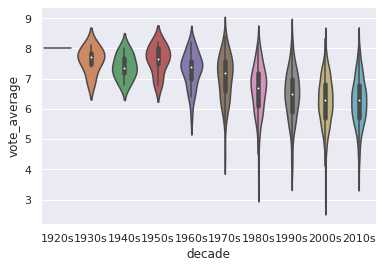

In [62]:
sns.violinplot(x='decade', y='vote_average', data=df.sort_values('decade'))

### sns.swarmplot()

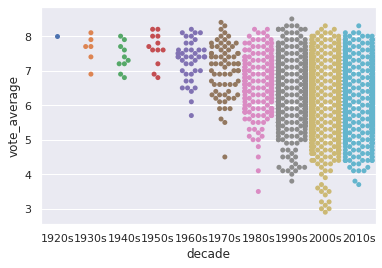

In [63]:
sns.swarmplot(x='decade', y='vote_average', data=df.sort_values('decade'))

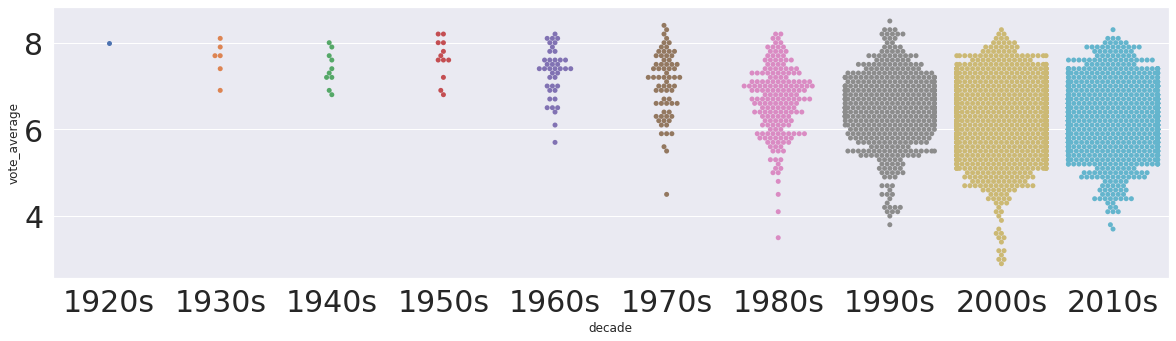

In [65]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.tick_params(labelsize=30)
sns.swarmplot(ax=ax, x='decade', y='vote_average', data=df.sort_values('decade'))

## Heatmap

### .corr()

In [75]:
df = pd.read_csv('tmdb_5000_movies.csv')
## remove the records with zero
df = df[(df != 0).all(axis=1)]
df.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,0.015819,0.431744,0.705306,0.229712,-0.035757,0.539997
id,0.015819,1.000000,0.180645,0.031826,-0.034371,-0.050815,0.109066
popularity,0.431744,0.180645,1.000000,0.602122,0.182388,0.288189,0.749005
revenue,0.705306,0.031826,0.602122,1.000000,0.233236,0.188014,0.756143
runtime,0.229712,-0.034371,0.182388,0.233236,1.000000,0.386199,0.258101
vote_average,-0.035757,-0.050815,0.288189,0.188014,0.386199,1.000000,0.380825
vote_count,0.539997,0.109066,0.749005,0.756143,0.258101,0.380825,1.000000


### sns.heatmap()

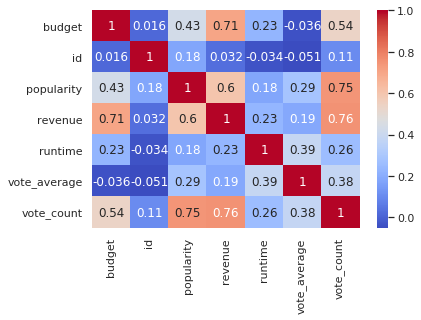

In [77]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [105]:
df['year'] = df['release_date'].apply(lambda x: x[:4])
df['month'] = df['release_date'].apply(lambda x: x[5:7])
revenue_df = df.groupby(['year', 'month']).mean()[['revenue']].pivot_table(values='revenue', index='month', columns='year')

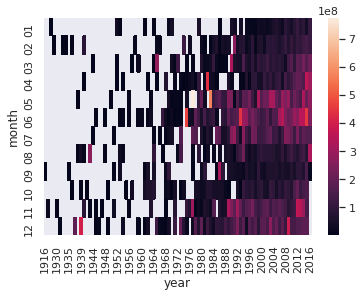

In [106]:
sns.heatmap(revenue_df)

## Style

### sns.set()

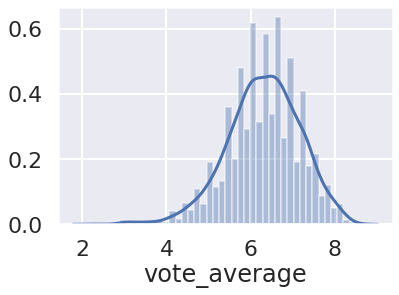

In [112]:
# context: 'paper', 'notebook', 'talk', 'poster'
# sns.set(context='paper')
sns.set_context('poster')
sns.distplot(df['vote_average'])

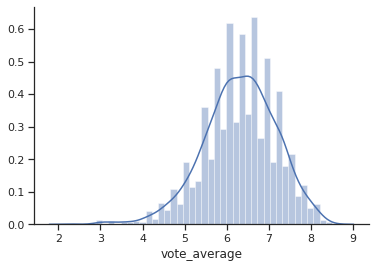

In [116]:
# style: 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'
sns.set(context='notebook', style='ticks')
sns.distplot(df['vote_average'])
sns.despine()

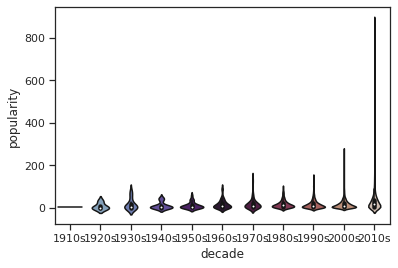

In [140]:
# palette: deep, muted, bright, pastel, dark, colorblind
sns.set(context='notebook', style='ticks', palette='bright')

df =pd.read_csv('tmdb_5000_movies.csv')
df = df[~df['release_date'].isna()]
df['decade'] = df['release_date'].apply(lambda x: x[:3] + '0s')
df['evaluation'] = df['vote_average'].apply(lambda x: 'high' if x > df['vote_average'].median() else 'low')
sns.violinplot(x='decade', y='popularity', data=df.sort_values('decade'), palette='twilight')

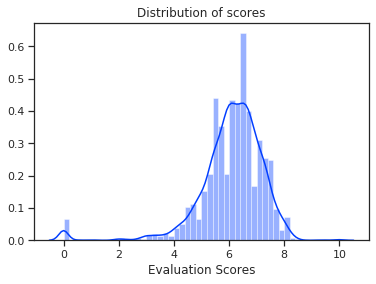

In [143]:
sns.distplot(df['vote_average'])
plt.title('Distribution of scores')
plt.xlabel('Evaluation Scores')
plt.savefig('saved_seaborn.png')

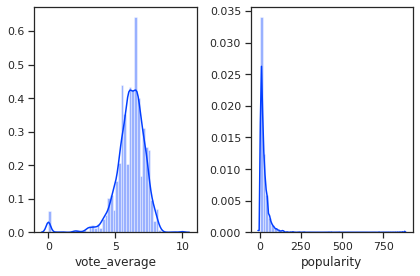

In [146]:
fig, axes = plt.subplots(1, 2)
sns.distplot(df['vote_average'], ax=axes[0])
sns.distplot(df['popularity'], ax=axes[1])
fig.tight_layout()